In [1]:
import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [2]:
from rich import print as rprint
from torch.utils.data import DataLoader

from analysis.utils import load_model
from koopmann import aesthetics
from koopmann.data import DatasetConfig, get_dataset_class
from koopmann.utils import compute_model_accuracy, get_device
from koopmann.visualization import plot_decision_boundary

%load_ext autoreload
%autoreload 2

In [3]:
file_dir = "/scratch/nsa325/koopmann_model_saves"
data_root = "/scratch/nsa325/datasets/"
model_name = "resmlp5_yinyang"
device = get_device()

In [4]:
model, model_metadata = load_model(file_dir, model_name)
model.hook_model().eval().to(device)
rprint("MLP Metadata: ", model_metadata)

MLP Metadata: 
{
    'batchnorm': True,
    'bias': True,
    'created_at': '2025-05-07T14:35:24.868647',
    'dataset': 'YinYangDataset',
    'hidden_config': [10, 10, 10, 10, 10],
    'in_features': 2,
    'model_class': 'ResMLP',
    'nonlinearity': 'relu',
    'out_features': 3,
    'stochastic_depth_mode': 'batch',
    'stochastic_depth_prob': 0.0
}

In [5]:
# Dataset config
dataset_config = DatasetConfig(
    dataset_name=model_metadata["dataset"],
    num_samples=3_000,
    split="test",
    seed=42,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config, root=data_root)
dataloader = DataLoader(dataset, batch_size=512)

In [6]:
rprint(f"Testing Accuracy: {compute_model_accuracy(model, dataloader, device)}")

Testing Accuracy: 0.9936666488647461

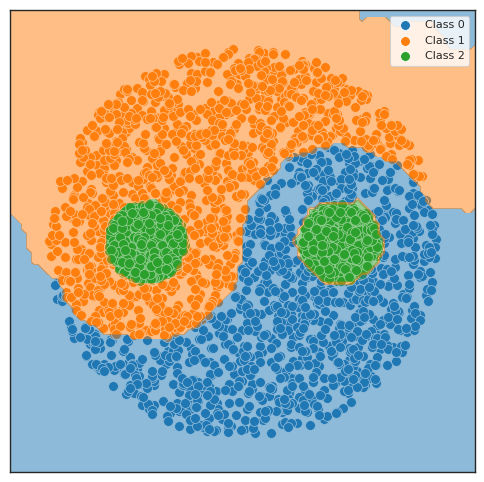

In [7]:
if dataset.in_features == 2:
    plot_decision_boundary(
        model,
        model.state_dict(),
        dataset.features,
        dataset.labels.squeeze(),
        labels=[0, 1, 2],
    )